# Exploring Nigeria's major cereals import

Nigeria has over 800 million hectares of arable land with over half yet to be utilized and with almost 300 cubic metres of water, allowing for a large expanse of this land to be irrigated and yet, the country spends over 10 billion dollars annually importing food and agricultural produce, most especially cereals.The yield gotten from the local production of these crops is way below the demand as a result of unsustainable production practices thereby making importation the only way of feeding the ever growing populace.
The aim of this analysis was to get an insight of the amount spent on the importation of the four most consumed cereals(Wheat, Maize, Rice and Oats) within the span of four years(2018-2019). This will give an idea of the money being used by the country on the importation of commodities than it can and should otherwise produce.


In [1]:
from pandas import *
import matplotlib.pyplot as plt

# Preparing and getting the data

The data was gotten from the United Nations Comtrade website (https://comtrade.un.org/data) and was downloaded directly into the notebook using the URL. The table conist of 140 rows and 35 columns. The first five rows of the table is shown below.


In [7]:
URL='http://comtrade.un.org/api/get?max=5000&type=C&freq=A&px=HS&ps=2018%2C2019%2C2020%2C2021&r=566&p=all&rg=1&cc=100111%2C100610%2C100510%2C100410&fmt=csv'



In [10]:
data=read_csv(URL, dtype={'Commodity Code':str, 'Reporter Code':str})
data.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2018,2018,2018,6,1,1,Import,566,Nigeria,...,0,NaN,NaN,NaN,NaN,NaN,566867014,NaN,NaN,6
1,H4,2018,2018,2018,6,1,1,Import,566,Nigeria,...,76048,NaN,NaN,NaN,76048.0,NaN,16549392,NaN,NaN,0
2,H4,2018,2018,2018,6,1,1,Import,566,Nigeria,...,85760300,NaN,NaN,NaN,85760300.0,NaN,115266557,NaN,NaN,0
3,H4,2018,2018,2018,6,1,1,Import,566,Nigeria,...,30010800,NaN,NaN,NaN,30010800.0,NaN,9301508,NaN,NaN,0
4,H4,2018,2018,2018,6,1,1,Import,566,Nigeria,...,52763500,NaN,NaN,NaN,52763500.0,NaN,12783642,NaN,NaN,0


In [11]:
data.shape

(140, 35)

The data was thoroughly checked for any missing values or special characters after which the columns of interest were selected and the rest discarded.

In [12]:
columns=['Year', 'Trade Flow', 'Partner', 'Commodity',  'Trade Value (US$)' ]
data=data[columns]
data

,Year,Trade Flow,Partner,Commodity,Trade Value (US$)
0,2018,Import,World,"Cereals; wheat and meslin, durum wheat, seed",566867014
1,2018,Import,Argentina,"Cereals; wheat and meslin, durum wheat, seed",16549392
2,2018,Import,Canada,"Cereals; wheat and meslin, durum wheat, seed",115266557
3,2018,Import,Cayman Isds,"Cereals; wheat and meslin, durum wheat, seed",9301508
4,2018,Import,Germany,"Cereals; wheat and meslin, durum wheat, seed",12783642
...,...,...,...,...,...
135,2020,Import,Thailand,Cereals; rice in the husk (paddy or rough),2127554
136,2021,Import,World,Cereals; rice in the husk (paddy or rough),288005
137,2021,Import,China,Cereals; rice in the husk (paddy or rough),2851
138,2021,Import,India,Cereals; rice in the husk (paddy or rough),284650


In [13]:
cereal_world_import=data[data['Partner']=='World']
cereal_countries_import=data[data['Partner']!='World']

# Total import value

In [50]:
total_crop_import=cereal_countries_import.groupby( ['Commodity'])[['Trade Value (US$)']].agg(sum).sort_values(by='Trade Value (US$)', ascending=False)
total_crop_import

,Trade Value (US$)
Commodity,
"Cereals; wheat and meslin, durum wheat, seed",1218465093
"Cereals; maize (corn), seed",132835135
Cereals; rice in the husk (paddy or rough),19986337
"Cereals; oats, seeds",7012231


In [15]:
total=total_crop_import[['Trade Value (US$)']].sum()
total

Trade Value (US$)    1378298796
dtype: int64

This shows the total amount in US dollars spent on the importation of each crop and the total amount spent on importing the four crops from 2018 to 2021 which accounts to over 1 billion US dollars .It can be seen that Wheat has the highest import value accounting to over 80% 0f the total import in the four years.Oats is the least imported of the four crops    

# Total import by year

In [16]:
tot_imp_year=cereal_countries_import.pivot_table(values='Trade Value (US$)', index='Year', columns='Commodity', aggfunc=sum, )
tot_imp_year

Commodity,"Cereals; maize (corn), seed","Cereals; oats, seeds",Cereals; rice in the husk (paddy or rough),"Cereals; wheat and meslin, durum wheat, seed"
Year,,,,
2018,24585991,399499,6283097,566867010
2019,13619275,294045,70339,570157842
2020,89944414,3863879,13344897,80211576
2021,4685455,2454808,288004,1228665


Although wheat has the highest import value in the four years, more money was spent on the importation of maize than wheat in 2020 and 2021. This could be attributed to the corona virus outbreak in 2020, and the high cost of wheat at the international market in the two years thereby making the demand for maize, its close substitute higher.

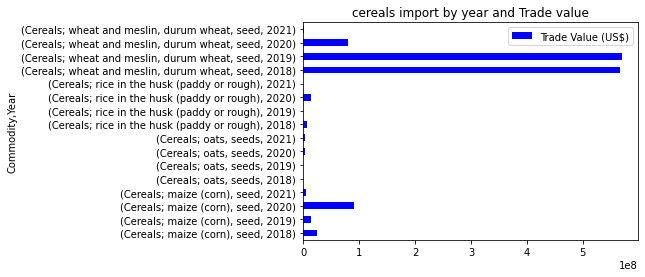

In [43]:
cereal_countries_import.groupby(['Commodity', 'Year'])[['Trade Value (US$)']].aggregate(sum).plot(kind='barh', color='b')
plt.title('cereals import by year and Trade value')
plt.show()


The plot shows that the highest wheat import was recorded in 2019 while maize import doubled by more than 80% from 2019 to  2020. That is to say, more maize was imported in 2020. A high percentage of this demand came from the animal feed sector.

In [18]:
import numpy as np

# Main partner countries by crop

                    Trade Value (US$)
Partner                              
USA                         426018229
Russian Federation          319020570
Canada                      207062676
Argentina                    77752651
Lithuania                    58022499


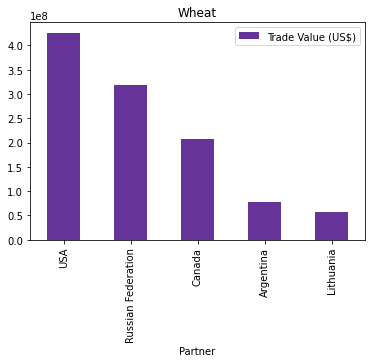

In [49]:
wheat_partner=cereal_countries_import[cereal_countries_import['Commodity']=='Cereals; wheat and meslin, durum wheat, seed'].groupby('Partner')[['Trade Value (US$)']].agg(sum)
wheat_partner_sorted=wheat_partner.sort_values(by='Trade Value (US$)', ascending=False).head()
print(wheat_partner_sorted)
wheat_partner_sorted.plot( kind='bar', color='#663399')
plt.title('Wheat')
plt.show()


The main importers of wheat into Nigeria are shown above. A high percentage of wheat is imported into Nigeria from the USA and from Russia Federation with a trade value of over 426 million USD and  319 million USD respectively from 2018-2021

           Trade Value (US$)
Partner                     
Argentina           89481310
USA                 16054985
China               12974270
Brazil               8546456
India                1817215


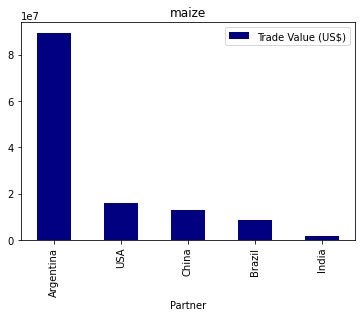

In [34]:
maize_partner=cereal_countries_import[cereal_countries_import['Commodity']=='Cereals; maize (corn), seed'].groupby('Partner')[['Trade Value (US$)']].agg(sum)
maize_partner_sorted=maize_partner.sort_values(by='Trade Value (US$)', ascending=False).head()
print(maize_partner_sorted)
maize_partner_sorted.plot( kind='bar', color='#000080')
plt.title('maize')
plt.show()

          Trade Value (US$)
Partner                    
India              11335472
Brazil              6280237
Thailand            2130005
China                166153
Viet Nam              39953


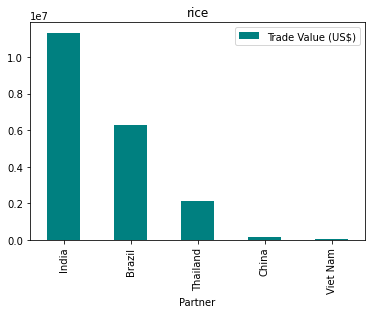

In [35]:
rice_partner=cereal_countries_import[cereal_countries_import['Commodity']=='Cereals; rice in the husk (paddy or rough)'].groupby('Partner')[['Trade Value (US$)']].agg(sum)
rice_partner_sorted=rice_partner.sort_values(by='Trade Value (US$)', ascending=False).head()
print(rice_partner_sorted)
rice_partner_sorted.plot( kind='bar', color='#008080')
plt.title('rice')
plt.show()


                Trade Value (US$)
Partner                          
China                     2931307
Canada                    1972979
United Kingdom            1065919
Belgium                    300603
Argentina                  276960


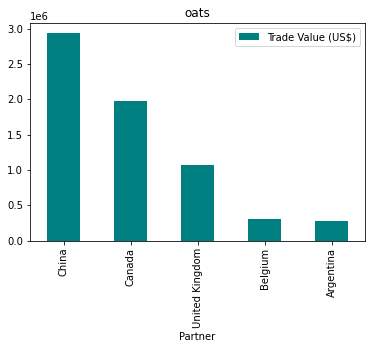

In [47]:
# oat_partner=cereal_countries_import[cereal_countries_import['Commodity']=='Cereals; oats, seeds'].groupby('Partner')[['Trade Value (US$)']].agg(sum)
oat_partner_sorted=oat_partner.sort_values(by='Trade Value (US$)', ascending=False).head()
print(oat_partner_sorted)
oat_partner_sorted.plot( kind='bar', color='#008080')
plt.title('oats')
plt.show()


For a country to be able to export its food to other countries, she must have more than enough to satisfy the need of her citizens. Therefore, knowing the countries where a large quantity of these crops are exported  will make it possible to study and adopt the production practices of these countries

# Conclusion

From the analysis above, it can be deduced that a large percentage of Nigeria's revenue is spent on the importation of commodities from partner countries. Although there are products that the country don't have the required technical know-how to produce, agricultural food items shoud be an exception. The problems of local production can be solved through the provision of  varieties that are  able to adapt to the prevailing environmental conditions, and helping farmers to improve on their yield per hectare.